# Mask Detection 

### Importing Libraries

In [23]:
import numpy as np
import keras
import keras.backend as k
from keras.layers import Conv2D,MaxPooling2D,SpatialDropout2D,Flatten,Dropout,Dense
from keras.models import Sequential,load_model
from keras.optimizers import Adam
from keras.preprocessing import image
import cv2
import datetime
import matplotlib.pyplot as plt

### Image Pre-processing

In [2]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

In [6]:
training_set = train_datagen.flow_from_directory(
        'train',
        target_size=(150,150),
        batch_size=16 ,
        class_mode='binary')

FileNotFoundError: [Errno 2] No such file or directory: 'train'

In [ ]:
test_set = test_datagen.flow_from_directory(
        'test',
        target_size=(150,150),
        batch_size=16,
        class_mode='binary')

### Model building

In [3]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D() )
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D() )
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D() )
model.add(Flatten())
model.add(Dense(100,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model_saved=model.fit_generator(
        training_set,
        epochs=10,
        validation_data=test_set,

        )

#### To save the model

In [ ]:
model.save('mymodel.h5',model_saved)

#### To load existing model

In [4]:
mymodel=load_model('mymodel.h5')

### Predicting Images

In [31]:
def predict(file):
    loaded_image=image.load_img(r'/home/sid/DMW/'+file,target_size=(150,150,3))
    i=plt.imread('/home/sid/DMW/'+file)
    plt.imshow(i)
    test_image=image.img_to_array(loaded_image)

    test_image=np.expand_dims(test_image,axis=0)
    
    if mymodel.predict(test_image)[0][0]==1.0:
        print('No mask detected!')
    else:
        print('Mask detected')

Mask detected


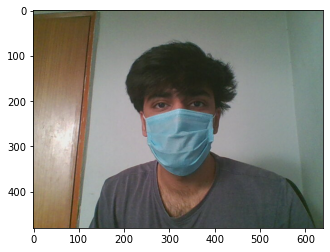

In [32]:
predict('masksid.jpg')

No mask detected!


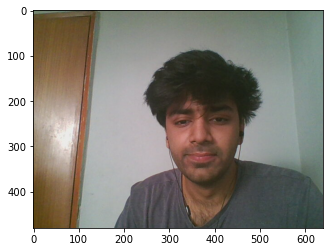

In [33]:
predict('nomasksid.jpg')